In [89]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, precision_recall_curve

mnist = datasets.load_digits()

In [3]:
X = mnist['data']
y = mnist['target']

In [7]:
# We have 1,797 8x8 images

X.shape, y.shape

((1797, 64), (1797,))

In [14]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# Data Splitting

In [6]:
# Since this is a simple dataset, we don't really need to make pipelines to normalize the data.

In [23]:
train_size = 0.8

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Helper Functions

In [87]:
def conf_matrix_info(X_train_preds, y_scores):
    print(precision_score(X_train_preds, y_scores, average='micro'))
    print(recall_score(X_train_preds, y_scores, average='micro'))
    print(f1_score(X_train_preds, y_scores, average='micro'))

# SGD Classifier

In [38]:
sgd = SGDClassifier(random_state=42)

In [39]:
sgd_scores = cross_val_score(sgd, X_train, y_train, cv=5, scoring='accuracy')

In [40]:
print(f'scores: {sgd_scores}')
print(f'average: {sgd_scores.mean()}')

scores: [0.95862069 0.9100346  0.93402778 0.95438596 0.94385965]
average: 0.9401857367088324


In [ ]:
# Testing with cross_val_predict to get the actual scores.

In [59]:
sgd_pred_scores = cross_val_predict(sgd, X_train, y_train, cv=5, method='decision_function')

In [63]:
sgd_X_train_preds = []

for i in sgd_pred_scores:
    sgd_X_train_preds.append(i.argmax())

In [64]:
sgd_matrix = confusion_matrix(sgd_X_train_preds, y_train)

In [65]:
sgd_matrix

array([[138,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 124,   0,   0,   1,   1,   0,   1,   8,   2],
       [  0,   0, 142,   1,   0,   0,   0,   0,   1,   0],
       [  0,   3,   1, 147,   0,   1,   0,   0,   3,   1],
       [  2,   1,   0,   0, 136,   0,   1,   0,   1,   0],
       [  0,   1,   0,   1,   0, 132,   1,   0,   0,   0],
       [  0,   1,   0,   0,   2,   1, 147,   0,   2,   0],
       [  0,   0,   0,   1,   1,   1,   0, 137,   0,   1],
       [  0,  16,   2,   2,   2,   1,   1,   1, 114,   5],
       [  0,   5,   0,   1,   0,   2,   0,   4,   1, 134]])

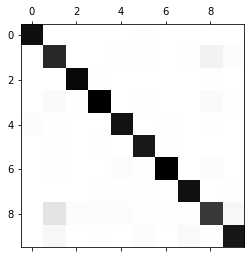

In [93]:
plt.matshow(sgd_matrix, cmap=plt.cm.binary)
plt.show()

In [88]:
conf_matrix_info(sgd_X_train_preds, y_train)

0.9401530967292971
0.9401530967292971
0.9401530967292971


# Random Forest Classifier

In [41]:
rfc = RandomForestClassifier(random_state=42)

In [42]:
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [43]:
print(f'rfc_scores: {rfc_scores}')
print(f'averge: {rfc_scores.mean()}')

rfc_scores: [0.95517241 0.96193772 0.95833333 0.92631579 0.91578947]
averge: 0.9435097453094615


In [51]:
rfc_X_train_pred = cross_val_predict(rfc, X_train, y_train, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [53]:
rfc_X_train_pred

array([3, 2, 7, ..., 7, 7, 1])

In [66]:
rfc_matrix = confusion_matrix(rfc_X_train_pred, y_train)

In [67]:
rfc_matrix

array([[138,   0,   0,   0,   1,   1,   0,   0,   1,   0],
       [  0, 148,   1,   0,   0,   2,   1,   0,  10,   1],
       [  0,   1, 141,   1,   0,   0,   0,   0,   2,   0],
       [  0,   0,   0, 139,   0,   1,   0,   0,   1,   6],
       [  2,   0,   0,   0, 138,   0,   1,   2,   1,   1],
       [  0,   0,   0,   2,   0, 131,   2,   0,   2,   1],
       [  0,   0,   0,   0,   0,   2, 145,   0,   3,   0],
       [  0,   0,   1,   2,   2,   0,   0, 139,   1,   2],
       [  0,   1,   0,   5,   0,   1,   1,   1, 109,   4],
       [  0,   1,   2,   4,   1,   2,   0,   1,   0, 128]])

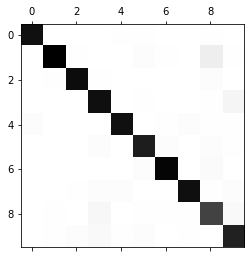

In [83]:
plt.matshow(rfc_matrix, cmap=plt.cm.binary)
plt.show()

In [84]:
conf_matrix_info(rfc_X_train_pred, y_train)

0.9436325678496869
0.9436325678496869
0.9436325678496869


# Comparisons